<a href="https://colab.research.google.com/github/riyaz7781/Excel-R-assignments/blob/main/Emotion_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import warnings
warnings.filterwarnings("ignore")

Load the Dataset

In [4]:
data1=pd.read_csv("/content/Elon_musk.csv",encoding="latin1",error_bad_lines=False)
data1.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


Dropping the Numerical Column

In [5]:
data2=data1["Text"]
data2

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [6]:
data2 = [x.strip() for x in data2] # remove both the leading and the trailing characters
data2 = [x for x in data2 if x] # removes empty strings, because they are considered in Python as False
data2[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [9]:
nlp = spacy.load('en_core_web_sm')

In [10]:
one_block = data2[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

Tokenisation

In [11]:
for token in doc_block[:]:
    print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [12]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

#print(nouns_verbs[5:25])
nouns_verbs

['tracing', 'level', 'tried']

Feature Extraction

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [16]:
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names_out())
temp_df

,level,tracing,tried
0,0,1,0
1,1,0,0
2,0,0,1


In [18]:
sum_words = X.sum(axis=0)
wf_df = pd.DataFrame({'word' : cv.get_feature_names_out(),
                      'count' : np.array(sum_words).flatten()})
wf_df

,word,count
0,level,1
1,tracing,1
2,tried,1


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

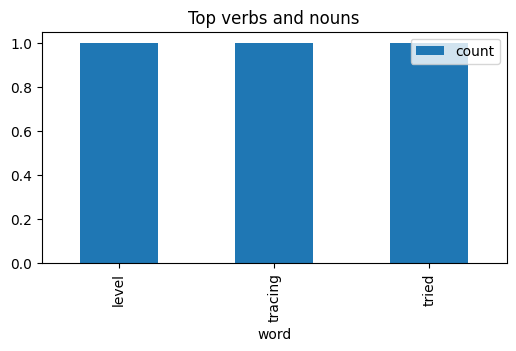

In [20]:
wf_df[0:15].plot.bar(x='word', figsize=(6,3), title='Top verbs and nouns')

Affin Dataset

In [22]:
affin1=pd.read_csv("/content/Afinn.csv",encoding="latin1")
affin1.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Tokenisation

In [25]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data2))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [26]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


Counting the Values

In [27]:
affinity_scores = affin1.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [28]:
nlp = spacy.load('en_core_web_sm')

In [30]:
sentiment_lexicon = affinity_scores
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

Predicting the Value based on Sentiment

In [31]:
calculate_sentiment(text = 'Amazing, wonderful session')


8

In [32]:
calculate_sentiment(text = 'worst product and worst service ever')

-6

In [33]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0
923,"It may never pay out, as the stock cant b ht...",-4
924,Details Aug 28.,0
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [35]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11
923,"It may never pay out, as the stock cant b ht...",-4,31
924,Details Aug 28.,0,3
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


Scatterplot

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

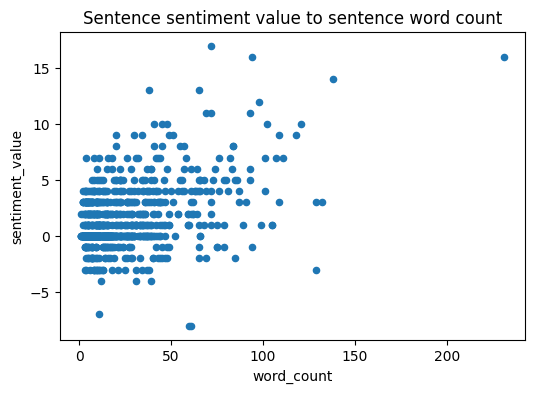

In [37]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(6,4),
                     title='Sentence sentiment value to sentence word count')